In [3]:
# So that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# https://matplotlib.org/stable/users/explain/interactive.html
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
# https://matplotlib.org/ipympl/installing.html 
%matplotlib widget

import functions 
from importlib import reload
reload(functions)
from functions import *
plt.close('all')

Initialisation
Initialisation


In [4]:
# load file

In [5]:
BMu_nb = 111

#one subject test
subject = 14
session = 'INI'
trial = 1

BMu_function, preprocessing,muscles,task, mvc_computation,mvc_task,contraction_computation,event_computation,event_type,kwargs = BMu_dict['BMu'+str(BMu_nb)]
BMu_dict['BMu'+str(BMu_nb)]
emg = load_file_subject_mvt_session2(subject,task,session,n=trial)[muscles[1]]
kwargs = {'nb_BM': BMu_nb,'muscle':muscles[0]}

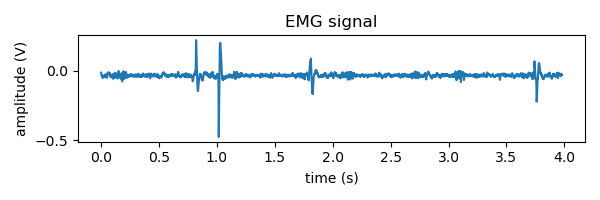

In [6]:
plot_1_channel_emg(emg)

In [9]:
def comparison_emg(emg1,emg2):
    print(f'Length of emg1 : {len(emg1)}, length emg2: {len(emg2)}, difference : {len(emg1)-len(emg2)}')

### Hampel filter

In [29]:
emg_hampel_10,idx_hampel = hampel_filter(emg,win_=1,n_sigmas=10)
emg_hampel_5,idx_hampel = hampel_filter(emg,win_=0.1,n_sigmas=2)

In [30]:
comparison_emg(emg,emg_hampel_10)

Length of emg1 : 3980, length emg2: 3980, difference : 0


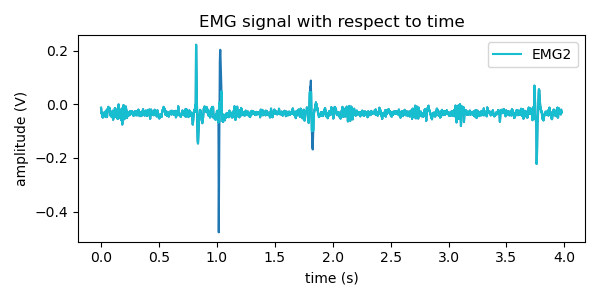

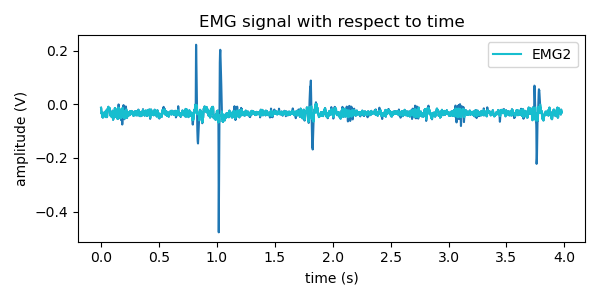

In [31]:
plot_2_channel_emg(emg,emg_hampel_10)
plot_2_channel_emg(emg,emg_hampel_5)

### Adaptative butter filter

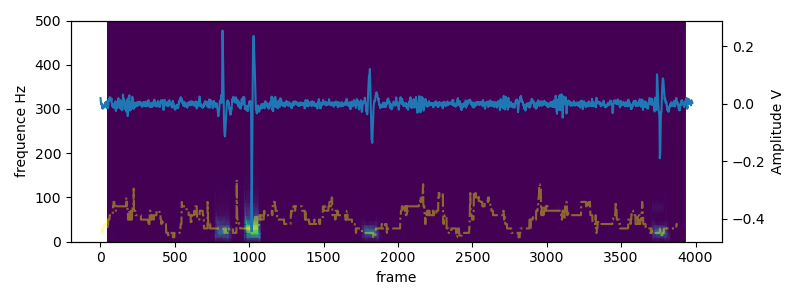

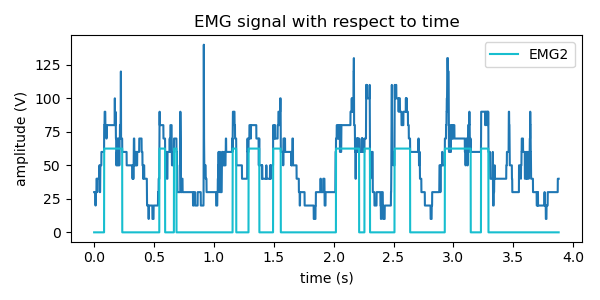

In [32]:
emg_adp_default = adaptive_butterfilter(emg,cf=30,win_base=0.3,win_time=0.02,nb_mean=1, nb_std=0,show_th = True,show_spectro=True)

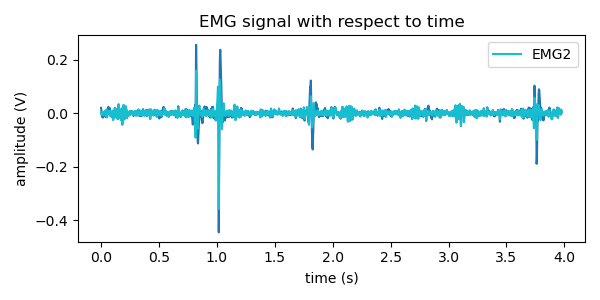

In [34]:
plot_2_channel_emg(mean_removal(emg),emg_adp_default)

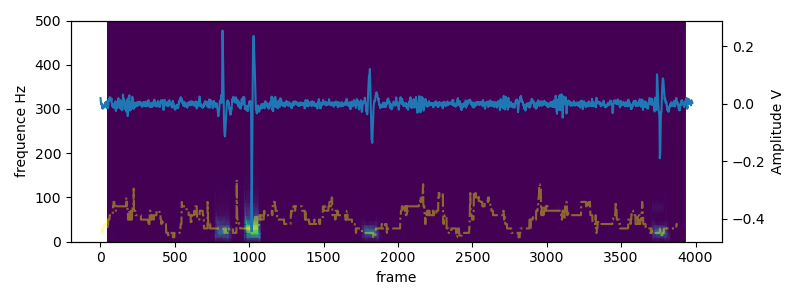

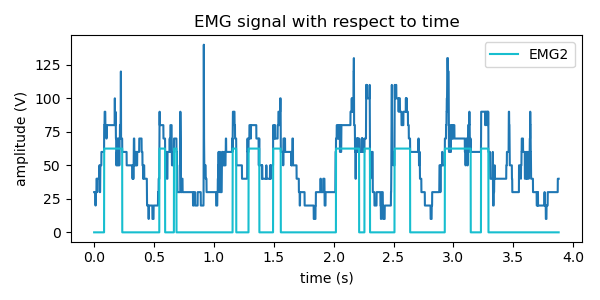

In [35]:
## with higher cf
emg_adp_50 = adaptive_butterfilter(emg,cf=50,win_base=0.3,win_time=0.02,nb_mean=1, nb_std=0,show_th = True,show_spectro=True)

c:\Users\Anais\Studio Code\Project 1\nslbp-bio_toolbox2\functions\plot_function.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize = figs)


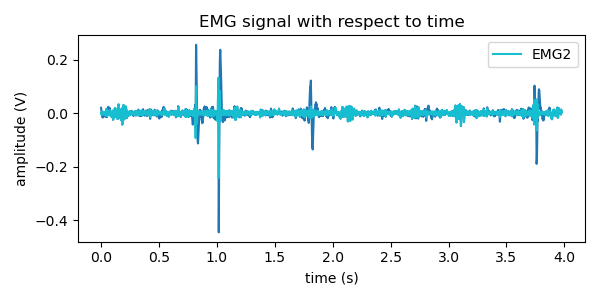

In [36]:
plt.close('all')
plot_2_channel_emg(mean_removal(emg),emg_adp_50)

### peak removal with std

In [49]:
plt.close('all')

In [50]:
idx,outlier,b,emg_out = deleteoutliers(emg.values,alpha=0.05,rep=0,fact=1)

In [52]:
comparison_emg(emg,b)
emg_2 = emg.copy(deep = True)
emg_2[idx] = np.mean(emg)
comparison_emg(emg,emg_2)
comparison_emg(emg,emg_out)

Length of emg1 : 3980, length emg2: 3872, difference : 108
Length of emg1 : 3980, length emg2: 3980, difference : 0
Length of emg1 : 3980, length emg2: 3980, difference : 0


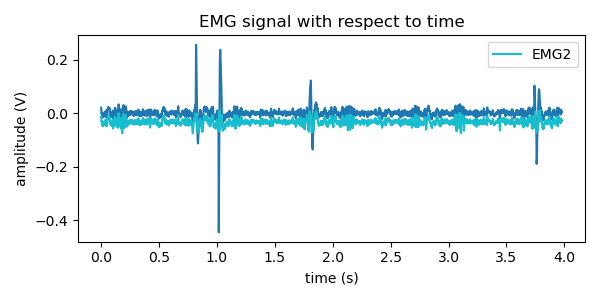

In [53]:
plot_2_channel_emg(mean_removal(emg),emg_out)

### comparison of the 3 functions

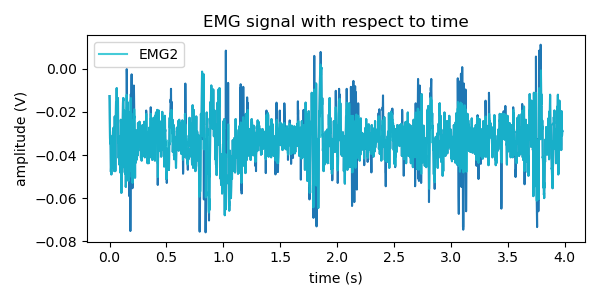

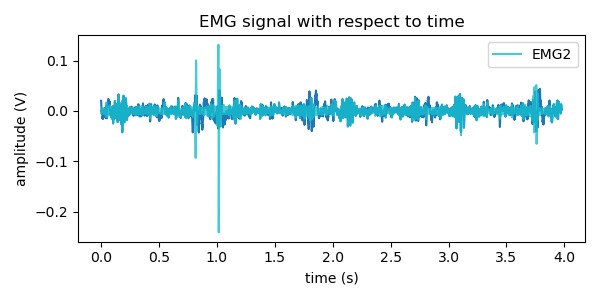

In [58]:
plot_2_channel_emg(emg_out,emg_hampel_5,al=0.8)
plot_2_channel_emg(mean_removal(emg_out),emg_adp_50,al=0.8)

# Onset detection

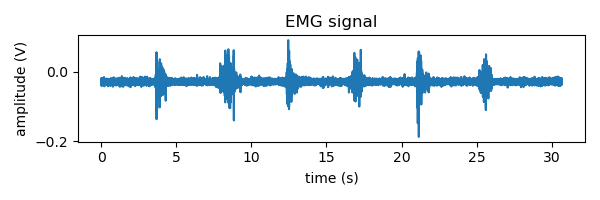

In [59]:
BMu_nb = 22

#one subject test
subject = 14
session = 'INI'
trial = 1

BMu_function, preprocessing,muscles,task, mvc_computation,mvc_task,contraction_computation,event_computation,event_type,kwargs = BMu_dict['BMu'+str(BMu_nb)]
BMu_dict['BMu'+str(BMu_nb)]
emg = load_file_subject_mvt_session2(subject,task,session,n=trial)[muscles[1]]
kwargs = {'nb_BM': BMu_nb,'muscle':muscles[0]}
plot_1_channel_emg(emg)

In [78]:
filtered_emg = butterfilter_dual(full_wave(mean_removal(emg)), 4,4 ,type = 'lowpass')

In [85]:
output, state_contraction, threshold_amp, number_onset_offset = double_threshold(filtered_emg,win = 0.5, time_win = 0.5,number_mean= 1, number_std = 1,baseline = [],show=True,sr=SAMPLING_RATE)

0.004050869795823273 500


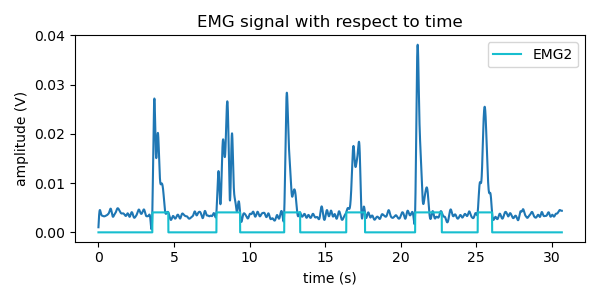

In [86]:
plot_2_channel_emg(filtered_emg,state_contraction*threshold_amp)

In [142]:
emg_tkeo = tkeo(mean_removal(emg))

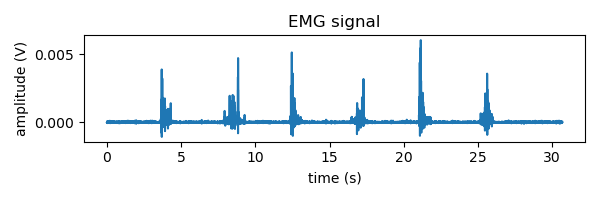

In [143]:
plot_1_channel_emg(emg_tkeo)

In [144]:
filtered_tkeo = butterfilter_dual(full_wave(mean_removal(butterfilter_bandpass_dual(emg_tkeo, 6,c_f_low=2,c_f_high=300, s_f = SAMPLING_RATE))),4,5)

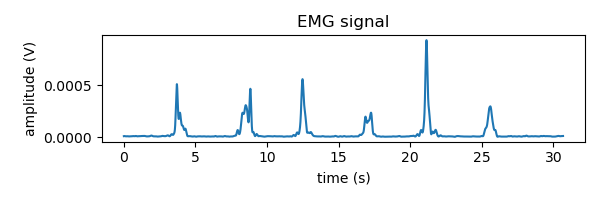

In [145]:
plot_1_channel_emg(filtered_tkeo)

In [149]:
output, state_contraction, threshold_amp, number_onset_offset = double_threshold(filtered_tkeo,win = 2, time_win = 0.15,number_mean= 1, number_std = 1,baseline = [],show=True,sr=SAMPLING_RATE)

1.3144514756215944e-05 150


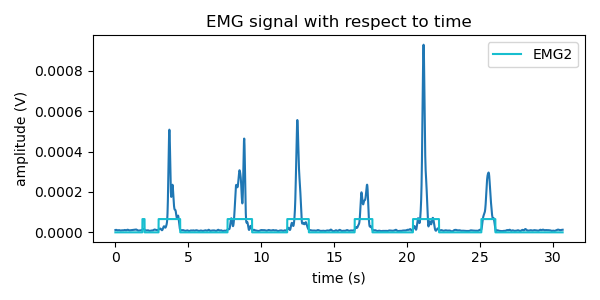

In [151]:
plot_2_channel_emg(filtered_tkeo,state_contraction*threshold_amp*5)